# Indeed Candidate Pool Analysis. 

The data set chosen was from the Job website "Indeed". The data encompasses a great deal of potential and current members of the workforce. 

The data includes a large amount of attributes to help improve granularity as well as a very large sample size (nearly 1,000,000 rows). This data set was chosen for it's potential to gain insight from. 

Some possible directions this data set could go are: projecting the chances of earning a career based on the factors included in one's profile, as well as possibly projecting what an individual should make based on the factors assciated (ie. years experience, role, etc.)

In [3]:
import pandas as pd
import numpy as np
import glob

# To read the files from the specified folder, here the data folder 
#glob(/train_*.csv')

# Importing data into Pandas
Reading data from CSV with Pandas

After loading the libraries necessary to perform the initial analysis, the next task to be accomplished was to load our data into Pandas. The data itself was split into to CSV files, so both were loaded As shown below:

In [4]:
# Loading the train_features dataset into features variable
features = pd.read_csv('C:\Users\hancojam\Documents\DataMiningNotebooks-master\DataMining\data/train_features_2013-03-07.csv')
features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


After loading the data sets it was determined that our data needed to be groomed. The first hurdle to be overcome was the fact that the data was in two seperate CSV files. 

We combatted this issue by performing what was essentially a left join on the two seperate data files.
As shown below:

In [5]:
# Loading the train_salaries dataset into salaries variable
salaries = pd.read_csv('C:\Users\hancojam\Documents\DataMiningNotebooks-master\DataMining\data/train_salaries_2013-03-07.csv')
salaries

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [7]:
# Merging the features and salaries together so that we have a complete data set
df = pd.merge(features, salaries, how='left')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Making sense of the data
Once the data was loaded and in an acceptible format (all in one data set) the analysis on direction of the data needed to occur as shown below we can see the general layout and format of the data types from the head, and info commands.

In [8]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


From the "df.info" command below it can be seen whether the data types populated from pandas need to be adjusted. Luckily from the analysis performed it was determing that all of the objects were correctly identified by Pandas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


The first calculations to be performed were to calculate the median, min and max years of experience, miles from metropolis and salary from the training data set.

Noticed that the minimum salary is zero. Since those zeros represent missing data, it is necessary to impute a best estimate for those values or remove them. First identify how many zeros are in the dataset by creating a dictionary of the counts of the salaries in the dataset.

In [7]:
# Getting count of salary values, especially the 0s
counts = df.salary.value_counts()
dict(counts)

{0: 5,
 17: 1,
 18: 3,
 19: 10,
 20: 43,
 21: 49,
 22: 63,
 23: 107,
 24: 129,
 25: 173,
 26: 232,
 27: 309,
 28: 347,
 29: 463,
 30: 518,
 31: 553,
 32: 614,
 33: 743,
 34: 800,
 35: 927,
 36: 1096,
 37: 1108,
 38: 1197,
 39: 1356,
 40: 1449,
 41: 1622,
 42: 1660,
 43: 1816,
 44: 1904,
 45: 2018,
 46: 2248,
 47: 2300,
 48: 2410,
 49: 2516,
 50: 2655,
 51: 2831,
 52: 3000,
 53: 3087,
 54: 3278,
 55: 3332,
 56: 3491,
 57: 3622,
 58: 3803,
 59: 4026,
 60: 4087,
 61: 4384,
 62: 4357,
 63: 4592,
 64: 4706,
 65: 4984,
 66: 5142,
 67: 5258,
 68: 5344,
 69: 5606,
 70: 5797,
 71: 5851,
 72: 6096,
 73: 6173,
 74: 6464,
 75: 6551,
 76: 6730,
 77: 6933,
 78: 7166,
 79: 7221,
 80: 7588,
 81: 7353,
 82: 7879,
 83: 7930,
 84: 8026,
 85: 8346,
 86: 8434,
 87: 8472,
 88: 8724,
 89: 8775,
 90: 9066,
 91: 9189,
 92: 9228,
 93: 9320,
 94: 9236,
 95: 9567,
 96: 9565,
 97: 9773,
 98: 9898,
 99: 9946,
 100: 9937,
 101: 10151,
 102: 10158,
 103: 10285,
 104: 10297,
 105: 10223,
 106: 10204,
 107: 10371,
 108

From the describe function below it is determined that our lowest salary is "0" meaning either this indivdual is unemployed, volunteering, or there is jsut an error in the data.

In [8]:
#Get Summary Statistics from the Data Frame
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


Due to this hiccup there are a few ways around the issue, a value can be imputed using the mean/ median of the data set, or the values can jsut be ommitted. Due to the massive size of this data set and the spread of the zero values (no obvious correlation between the indiduals) it was determind that the "0" values jsut be ommitted from the data set. 
As shown below:

In [9]:
df.boxplot(column='salary.min', by = 'jobType')

KeyError: 'Column not found: salary.min'

In [9]:
#Removed the Zero Salary Values
df = df[df.salary != 0]

In [10]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


# Setup of data 
Once the values included in the data appeared acceptible, the next step was to evaluate pieces and create a more well defined data set. 


As shown below it can easily be determined what the counts of each of the job types are and how many values of each there are. Luckily the data set seems to be fairly even in job types across the board.

In [12]:
titles = df.jobType.value_counts()
dict(titles)

{'CEO': 124778,
 'CFO': 124369,
 'CTO': 125045,
 'JANITOR': 124971,
 'JUNIOR': 124592,
 'MANAGER': 125120,
 'SENIOR': 125886,
 'VICE_PRESIDENT': 125234}

As shown below it can easily be determined what the counts of each of the major are and how many values of each there are. Luckily the data set seems to be fairly even in values for major across the board.

In [13]:
major = df.major.value_counts()
dict(major)

{'BIOLOGY': 58379,
 'BUSINESS': 58518,
 'CHEMISTRY': 58875,
 'COMPSCI': 58382,
 'ENGINEERING': 58594,
 'LITERATURE': 58684,
 'MATH': 57800,
 'NONE': 532353,
 'PHYSICS': 58410}

Degree as with the other two attributes also appears to be very even, with more indivduals having no degree, as to be expected.

In [14]:
degree = df.degree.value_counts()
dict(degree)

{'BACHELORS': 175495,
 'DOCTORAL': 175362,
 'HIGH_SCHOOL': 236975,
 'MASTERS': 175310,
 'NONE': 236853}

In [15]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [16]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


# Data Analysis
With the data is understood and in an acceptible format, the time came where the data needed to be anlyzed and plotted. 
Below are the libraries used to map the data sets into plots.

In [18]:
# Import matplot lib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [19]:
import seaborn as sns
cmap = sns.diverging_palette(220,10, as_cmap=True)

The first plot to be perormed is salary based on the position or job type. As shown in the output of cell 20, it can easily be seen that the CEO is the highest paid individual on the list with officers ranging down in salary all the way down to to the lowest paid in idividuals, the janitor.

No surprises here as it would be expected that very senior level individuals would be more well compnesated for there skills.

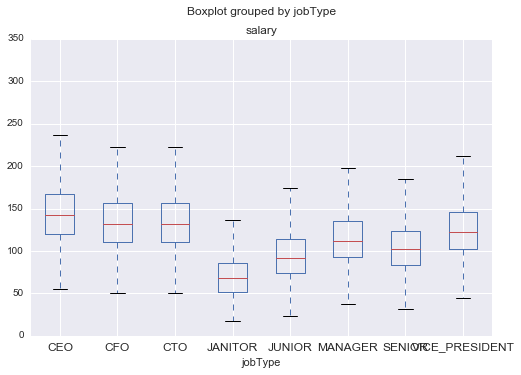

In [20]:
#Lets do Boxplots of Salary Grouped by Job Type
df.boxplot(column='salary', by = 'jobType')

The next logical box plot was to graph the ranges in salaries for the various industires. From the plot below it can be seen that web, finance, and oil all have high salary ranges where as education and service industies have fairly low salaries.

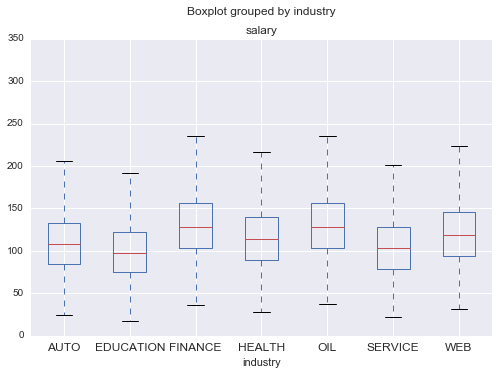

In [21]:
#Lets do Boxplots of  Grouped by Job Type
df.boxplot(column='salary', by = 'industry')

The final plot deemed necessary for the data set was to perform a box plot of salary in relation to degree achieved. As expected the highed degree achieved the higher the salary, with the exception of a doctoral degree, and masters degree being very similar in peak. Most likely a determinant of the fact that salaries in education are lower as a whole.

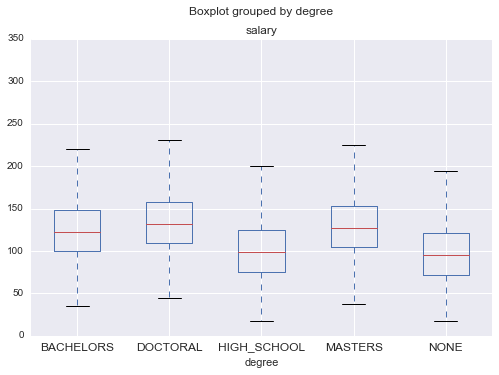

In [22]:
#Lets do Boxplots of  Grouped by Job Type
df.boxplot(column='salary', by = 'degree')

The next plot necessary is a bar chart for the mean salries of each job type. This graph shows a lot more differentation of the data sets. It can more easily by graphing the means where the salaries reallly differ, as well the difference between the highest and lowest paying position.

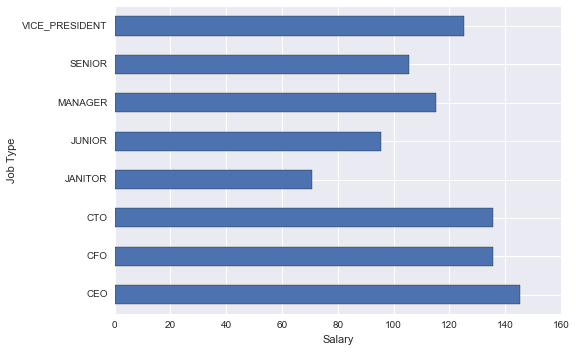

In [23]:
df_cjob = df.groupby(by=df.jobType).mean()
jobSal = df_cjob.salary
ax = jobSal.plot(kind='barh')
ax.set_xlabel("Salary")
ax.set_ylabel("Job Type")

After stating the fairly obvious using the plots. It was determined that matrices on the data sets were to be performed in order to spot variables that may not be obviously correlated. 

Below is a Matrix showing the relationship of three varios attributes to each other given an alpha of 0.2.  

From this it can be seen that years experience and proximity to metropolis are directly correlated to salary. however there appears to be absolutely no correlation between years of experience and miles from metropolis.

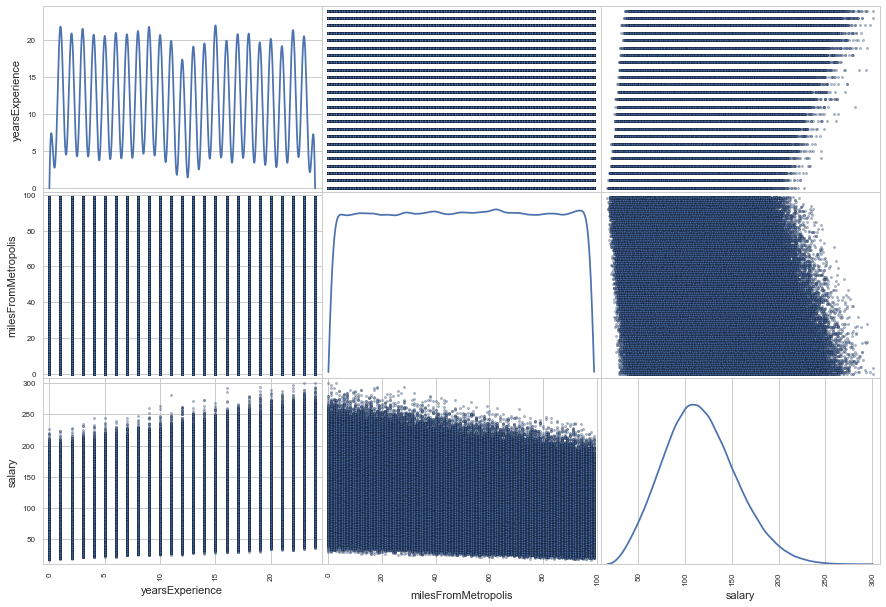

In [119]:
# Scatter plot matrix
from pandas.tools.plotting import scatter_matrix
ax1 = scatter_matrix(df, figsize=(15,10), diagonal='kde')
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

From the command below we can more easily see what most of the jobs in each industy are. As is usaully the case with this data sets, the values are incredibly even.

In [24]:
# No of jobTypes per Industry
jobCount = pd.crosstab(df['industry'],df['jobType'])
print jobCount

jobType      CEO    CFO    CTO  JANITOR  JUNIOR  MANAGER  SENIOR  \
industry                                                           
AUTO       17908  17614  17789    18082   17812    18104   17818   
EDUCATION  17838  17655  17911    17871   17975    17770   18075   
FINANCE    17913  17858  17773    17799   17759    17958   17902   
HEALTH     17626  17976  17668    17713   17954    17733   17945   
OIL        17883  17683  18077    17695   17495    17881   18190   
SERVICE    17703  17651  17943    17853   17759    17861   18014   
WEB        17907  17932  17884    17958   17838    17813   17942   

jobType    VICE_PRESIDENT  
industry                   
AUTO                17814  
EDUCATION           17724  
FINANCE             17904  
HEALTH              18140  
OIL                 17866  
SERVICE             17855  
WEB                 17931  


In [6]:
plt.figure(figsize=(15,10))
for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2,index+1)
    ax = df.boxplot()
plt.show()

NameError: name 'plt' is not defined

Due to the fact that it is planend to perform a Logistic Regression on the data set, "dummy" variables were created in order to help perform find possible values to project and fill.

In [26]:
dfa = pd.get_dummies(df, columns=['jobType', 'degree', 'major', 'industry'], drop_first=False).iloc[:,3:]

In [27]:
df = pd.get_dummies(df, columns=['jobType', 'degree', 'major', 'industry'], drop_first=False)

In [28]:
#Create a list of Categorical Variables

cSuiteJobs = ['jobType_CEO', 'jobType_CFO', 'jobType_CTO'];
jobTypes = ['jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR','jobType_JUNIOR','jobType_MANAGER','jobType_SENIOR', 'jobType_VICE_PRESIDENT'];
college = ['degree_BACHELORS', 'degree_DOCTORAL', 'degree_MASTERS'];
high_School_or_More = ['degree_HIGH_SCHOOL','degree_BACHELORS', 'degree_DOCTORAL', 'degree_MASTERS'];
majors = ['major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI', 'major_ENGINEERING', 'major_MATH', 'major_PHYSICS'];
industries = ['industry_AUTO', 'industry_EDUCATION', 'industry_FINANCE', 'industry_HEALTH', 'industry_OIL', 'industry_SERVICE', 'industry_WEB'];

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 34 columns):
jobId                     999995 non-null object
companyId                 999995 non-null object
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
salary                    999995 non-null int64
jobType_CEO               999995 non-null float64
jobType_CFO               999995 non-null float64
jobType_CTO               999995 non-null float64
jobType_JANITOR           999995 non-null float64
jobType_JUNIOR            999995 non-null float64
jobType_MANAGER           999995 non-null float64
jobType_SENIOR            999995 non-null float64
jobType_VICE_PRESIDENT    999995 non-null float64
degree_BACHELORS          999995 non-null float64
degree_DOCTORAL           999995 non-null float64
degree_HIGH_SCHOOL        999995 non-null float64
degree_MASTERS            999995 non-null float64
degree_NONE               999995 non-null float

In [30]:
#Group by Salary to Determine Median Salary for Each Job Type to Confirm Proper Ordering
df.groupby(by=cSuiteJobs).median()

yearsExperience  milesFromMetropolis  \
jobType_CEO jobType_CFO jobType_CTO                                         
0.0         0.0         0.0                       12                   50   
                        1.0                       12                   50   
            1.0         0.0                       12                   50   
1.0         0.0         0.0                       12                   49   

                                     salary  jobType_JANITOR  jobType_JUNIOR  \
jobType_CEO jobType_CFO jobType_CTO                                            
0.0         0.0         0.0             100              0.0             0.0   
                        1.0             132              0.0             0.0   
            1.0         0.0             132              0.0             0.0   
1.0         0.0         0.0             142              0.0             0.0   

                                     jobType_MANAGER  jobType_SENIOR  \
jobType_CEO jobType_CFO jobType_CTO                                    
0.0         0.0         0.0                      0.0             0.0   
                        1.0                      0.0             0.0   
            1.0         0.0                      0.0             0.0   
1.0         0.0         0.0                      0.0             0.0   

                                     jobType_VICE_PRESIDENT  degree_BACHELORS  \
jobType_CEO jobType_CFO jobType_CTO                                             
0.0         0.0         0.0                             0.0               0.0   
                        1.0                             0.0               0.0   
            1.0         0.0                             0.0               0.0   
1.0         0.0         0.0                             0.0               0.0   

                                     degree_DOCTORAL      ...       \
jobType_CEO jobType_CFO jobType_CTO                       ...        
0.0         0.0         0.0                      0.0      ...        
                        1.0                      0.0      ...        
            1.0         0.0                      0.0      ...        
1.0         0.0         0.0                      0.0      ...        

                                     major_MATH  major_NONE  major_PHYSICS  \
jobType_CEO jobType_CFO jobType_CTO                                          
0.0         0.0         0.0                 0.0         1.0            0.0   
                        1.0                 0.0         0.0            0.0   
            1.0         0.0                 0.0         0.0            0.0   
1.0         0.0         0.0                 0.0         0.0            0.0   

                                     industry_AUTO  industry_EDUCATION  \
jobType_CEO jobType_CFO jobType_CTO                                      
0.0         0.0         0.0                    0.0                 0.0   
                        1.0                    0.0                 0.0   
            1.0         0.0                    0.0                 0.0   
1.0         0.0         0.0                    0.0                 0.0   

                                     industry_FINANCE  industry_HEALTH  \
jobType_CEO jobType_CFO jobType_CTO                                      
0.0         0.0         0.0                       0.0              0.0   
                        1.0                       0.0              0.0   
            1.0         0.0                       0.0              0.0   
1.0         0.0         0.0                       0.0              0.0   

                                     industry_OIL  industry_SERVICE  \
jobType_CEO jobType_CFO jobType_CTO                                   
0.0         0.0         0.0                   0.0               0.0   
                        1.0                   0.0               0.0   
            1.0         0.0                   0.0               0.0   
1.0         0.0         0.0           

In [31]:
#Median All Job Types
df.groupby(by=jobTypes).median()

yearsExperience  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT                    
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                                  12   
                                                                                   1.0            0.0                                  12   
                                                                   1.0             0.0            0.0                                  12   
                                                    1.0            0.0             0.0            0.0                                  12   
                                    1.0             0.0            0.0             0.0            0.0                                  12   
                        1.0         0.0             0.0            0.0             0.0            0.0                                  12   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                                  12   
1.0         0.0         0.0         0.0             0.0            0.0             0.0            0.0                                  12   

                                                                                                                          milesFromMetropolis  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT                        
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                                      49   
                                                                                   1.0            0.0                                      50   
                                                                   1.0             0.0            0.0                                      49   
                                                    1.0            0.0             0.0            0.0                                      50   
                                    1.0             0.0            0.0             0.0            0.0                                      50   
                        1.0         0.0             0.0            0.0             0.0            0.0                                      50   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                                      50   
1.0         0.0         0.0         0.0             0.0            0.0             0.0            0.0                                      49   

                                                                                                                          salary  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT           
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                        122   
                                                                                   1.0            0.0                        102   
                                                                   1.0             0.0            0.0                        112   
                                                    1.0            0.0             0.0            0.0                         92   
                                    1.0             0.0            0.0             0.0            0.0                         68   
                        1.0         0.0             0.0            0.0             0.0            0.0                        132   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                        132   
1.0         0.0         0.0         0.0             0.0            0.0  

In [32]:
#Median All College Degrees
df.groupby(by=college).median()

yearsExperience  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0              0.0             0.0                          12   
                                 1.0                          12   
                 1.0             0.0                          12   
1.0              0.0             0.0                          12   

                                                 milesFromMetropolis  salary  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                                
0.0              0.0             0.0                              49      97   
                                 1.0                              50     127   
                 1.0             0.0                              50     132   
1.0              0.0             0.0                              50     122   

                                                 jobType_CEO  jobType_CFO  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                             
0.0              0.0             0.0                     0.0          0.0   
                                 1.0                     0.0          0.0   
                 1.0             0.0                     0.0          0.0   
1.0              0.0             0.0                     0.0          0.0   

                                                 jobType_CTO  jobType_JANITOR  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                                 
0.0              0.0             0.0                     0.0              0.0   
                                 1.0                     0.0              0.0   
                 1.0             0.0                     0.0              0.0   
1.0              0.0             0.0                     0.0              0.0   

                                                 jobType_JUNIOR  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                   
0.0              0.0             0.0                        0.0   
                                 1.0                        0.0   
                 1.0             0.0                        0.0   
1.0              0.0             0.0                        0.0   

                                                 jobType_MANAGER  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0              0.0             0.0                         0.0   
                                 1.0                         0.0   
                 1.0             0.0                         0.0   
1.0              0.0             0.0                         0.0   

                                                 jobType_SENIOR      ...       \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                      ...        
0.0              0.0             0.0                        0.0      ...        
                                 1.0                        0.0      ...        
                 1.0             0.0                        0.0      ...        
1.0              0.0             0.0                        0.0      ...        

                                                 major_MATH  major_NONE  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                           
0.0              0.0             0.0                    0.0         1.0   
                                 1.0                    0.0         0.0   
                 1.0             0.0                    0.0         0.0   
1.0              0.0             0.0                    0.0         0.0   

                                                 major_PHYSICS  industry_AUTO  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                                 
0.0              0.0             0.0                       0.0            0.0   
                                 1.0                       0.0            0.0   
                 1.0             0.0                       0.0            0.0   
1.0              0.0             0.0                  

In [33]:
#Median High School or More
df.groupby(by=high_School_or_More).median()

yearsExperience  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0                0.0              0.0             0.0                          12   
                                                    1.0                          12   
                                    1.0             0.0                          12   
                   1.0              0.0             0.0                          12   
1.0                0.0              0.0             0.0                          12   

                                                                    milesFromMetropolis  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                        
0.0                0.0              0.0             0.0                              49   
                                                    1.0                              50   
                                    1.0             0.0                              50   
                   1.0              0.0             0.0                              50   
1.0                0.0              0.0             0.0                              49   

                                                                    salary  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS           
0.0                0.0              0.0             0.0                 95   
                                                    1.0                127   
                                    1.0             0.0                132   
                   1.0              0.0             0.0                122   
1.0                0.0              0.0             0.0                 99   

                                                                    jobType_CEO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_CFO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_CTO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_JANITOR  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0                0.0              0.0             0.0                         0.0   
                                                    1.0                         0.0   
                                    1.0             0.0                         0.0   
                   1.0              0.0             0.0                         0.0   
1.0  

In [34]:
#Median All Majors
df.groupby(by=majors).median()

yearsExperience  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                    
0.0           0.0            0.0             0.0           0.0               0.0        0.0                         12   
                                                                                        1.0                         12   
                                                                             1.0        0.0                         12   
                                                           1.0               0.0        0.0                         12   
                                             1.0           0.0               0.0        0.0                         12   
                             1.0             0.0           0.0               0.0        0.0                         12   
              1.0            0.0             0.0           0.0               0.0        0.0                         12   
1.0           0.0            0.0             0.0           0.0               0.0        0.0                         12   

                                                                                                       milesFromMetropolis  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                        
0.0           0.0            0.0             0.0           0.0               0.0        0.0                             50   
                                                                                        1.0                             49   
                                                                             1.0        0.0                             50   
                                                           1.0               0.0        0.0                             50   
                                             1.0           0.0               0.0        0.0                             50   
                             1.0             0.0           0.0               0.0        0.0                             50   
              1.0            0.0             0.0           0.0               0.0        0.0                             50   
1.0           0.0            0.0             0.0           0.0               0.0        0.0                             50   

                                                                                                       salary  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS           
0.0           0.0            0.0             0.0           0.0               0.0        0.0               102   
                                                                                        1.0               127   
                                                                             1.0        0.0               130   
                                                           1.0               0.0        0.0               135   
                                             1.0           0.0               0.0        0.0               129   
                             1.0             0.0           0.0               0.0        0.0               126   
              1.0            0.0             0.0           0.0               0.0        0.0               132   
1.0           0.0            0.0             0.0           0.0               0.0        0.0               125   

                                                                                                       jobType_CEO  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                
0.0           0.0            0.0             0.0           0.0               0.0        0.0                    0.0   
                                                                                        1.0                    0.0   
                  

In [35]:
#Median All Industries
df.groupby(by=industries).median()

yearsExperience  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                    
0.0           0.0                0.0              0.0             0.0          0.0              1.0                        12   
                                                                               1.0              0.0                        12   
                                                                  1.0          0.0              0.0                        12   
                                                  1.0             0.0          0.0              0.0                        12   
                                 1.0              0.0             0.0          0.0              0.0                        12   
              1.0                0.0              0.0             0.0          0.0              0.0                        12   
1.0           0.0                0.0              0.0             0.0          0.0              0.0                        12   

                                                                                                              milesFromMetropolis  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                        
0.0           0.0                0.0              0.0             0.0          0.0              1.0                            49   
                                                                               1.0              0.0                            50   
                                                                  1.0          0.0              0.0                            49   
                                                  1.0             0.0          0.0              0.0                            50   
                                 1.0              0.0             0.0          0.0              0.0                            50   
              1.0                0.0              0.0             0.0          0.0              0.0                            50   
1.0           0.0                0.0              0.0             0.0          0.0              0.0                            50   

                                                                                                              salary  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB           
0.0           0.0                0.0              0.0             0.0          0.0              1.0              119   
                                                                               1.0              0.0              103   
                                                                  1.0          0.0              0.0              128   
                                                  1.0             0.0          0.0              0.0              114   
                                 1.0              0.0             0.0          0.0              0.0              128   
              1.0                0.0              0.0             0.0          0.0              0.0               98   
1.0           0.0                0.0              0.0             0.0          0.0              0.0              108   

                                                                                                              jobType_CEO  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                
0.0           0.0                0.0              0.0             0.0          0.0              1.0                   0.0   
                                                                               1.0              0.0                   0.0   
                                                                  1.0          0.0              0.0                   0.0   
                                            

In the graph below it is shown what the correlation between years experince and salary is for each year of experience. This graph is incredibly helpful in determining what one should make based on years experience, and when they would be getting a great offer or a bad one.

In [36]:
#sRange = pd.crosstab([df['industry'],df['jobType']],df.sal_Range.astype(int))

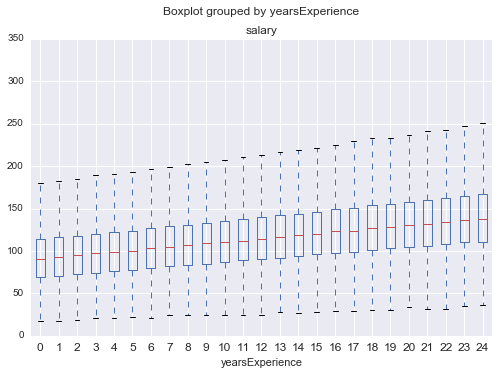

In [37]:
#Lets do Boxplots of  Grouped by jobType, YearsExp
df.boxplot(column='salary', by = 'yearsExperience')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 34 columns):
jobId                     999995 non-null object
companyId                 999995 non-null object
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
salary                    999995 non-null int64
jobType_CEO               999995 non-null float64
jobType_CFO               999995 non-null float64
jobType_CTO               999995 non-null float64
jobType_JANITOR           999995 non-null float64
jobType_JUNIOR            999995 non-null float64
jobType_MANAGER           999995 non-null float64
jobType_SENIOR            999995 non-null float64
jobType_VICE_PRESIDENT    999995 non-null float64
degree_BACHELORS          999995 non-null float64
degree_DOCTORAL           999995 non-null float64
degree_HIGH_SCHOOL        999995 non-null float64
degree_MASTERS            999995 non-null float64
degree_NONE               999995 non-null float

The incredible matrix shown below shows the positive and negative correlation between attributes. If the box is blue that would refer to a negative correlation or when one goes up the other goes down vice versa. Where as the red box depicts a positive correlation or they both go down and up together. 

Insights gained by this graph: From the graph there appears to be no correlation with officer level jobs and anything other than salary. Meaning education and years experience vary greatly for those high level jobs.

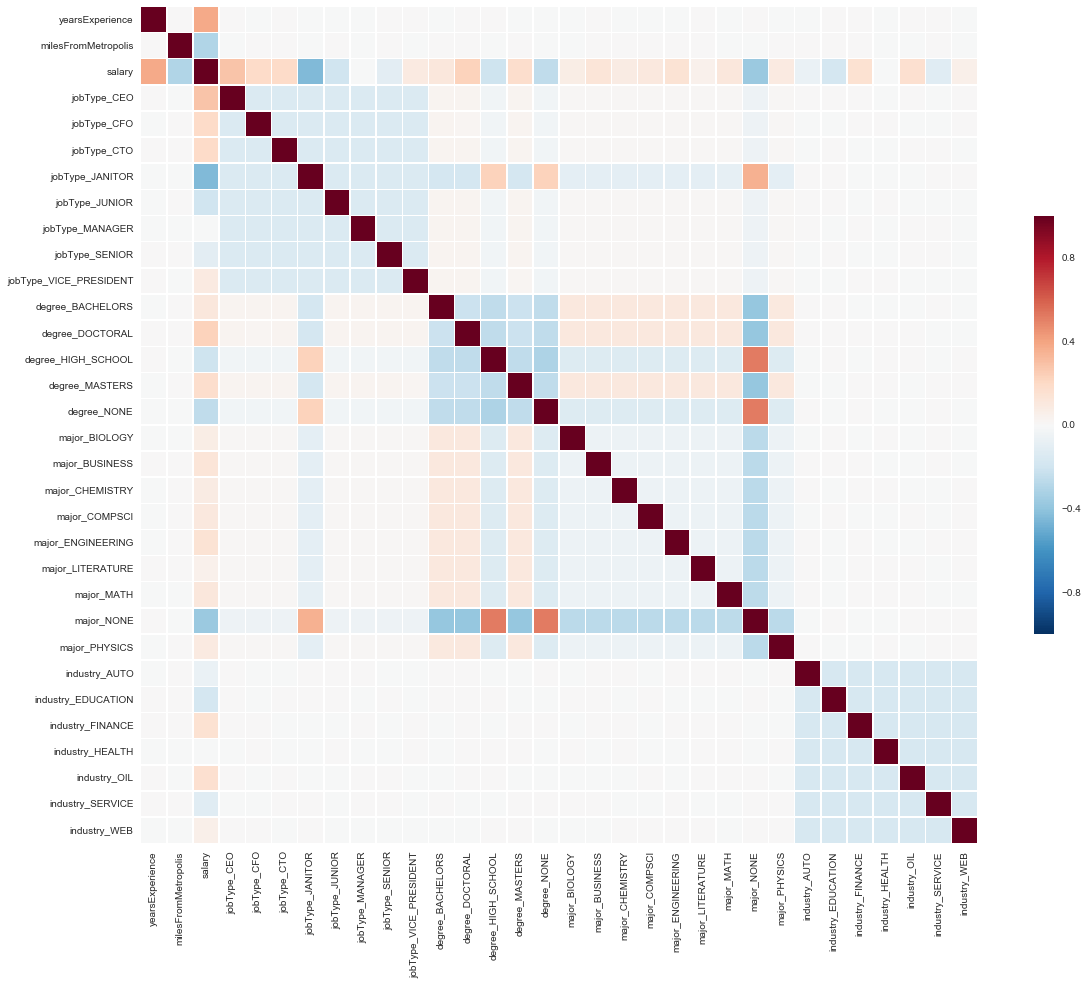

In [39]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, #annot=True, cmap=cmap, vmax=.3,
            square=True, #xticklabels=2, #yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Below is a stingray plot that shows the various salaries and distrubution. From this we can see that a majority of people are making in the low 100k range.

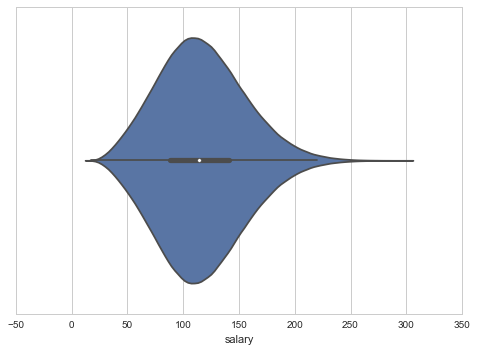

In [40]:
sns.set_style("whitegrid")
ax = sns.violinplot(x=df["salary"])


In [41]:
#cov_mat = np.cov(df.T)
#eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' % eigen_vals)

In [45]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
#Create X and Y Values from the Data Frame
X, y =dfa.iloc[:, 1:].values, dfa.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.7, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#Create Function for the Logistic Regression Plot
def plot_decision_regions(X, y, classifier, resolution=.02):
    #Setup marker generator and color map
    markers =('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 0].min() -1, X[:, 0].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #plot class samples
    for idx, cl in enumerate (np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
#Perform Logistic Regression
pca = PCA(n_components=None)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.legend(loc='lower left')
plt.show()
pca.explained_variance_ration_

ValueError: X has 2 features per sample; expecting 30